# Extra Trees Classifier

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

In [26]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)
with open('pickles/df_model.pkl', 'rb') as f:
    df_model = pickle.load(f)

In [28]:
df

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76455,183,Arson,CA,NONFED,0.0,E,38.440617,-121.075167,Amador-El Dorado Unit,2015,357.00,83,162.0,154.0,67.0,190.0,94.0,59.0,541.0,269.0,102.0
76458,195,Negligence,CA,NONFED,0.0,B,37.171042,-120.274453,CDF - Merced-Mariposa Unit,2015,1.00,72,158.0,222.0,21.0,229.0,154.0,73.0,371.0,401.0,140.0
76459,206,Negligence,CA,NONFED,0.0,A,39.356385,-123.332874,Mendocino Unit,2015,0.01,576,131.0,217.0,168.0,252.0,162.0,58.0,349.0,399.0,358.0
76468,223,Infrastructure,CA,NONFED,0.0,A,35.154062,-120.551844,San Luis Obispo Unit,2015,0.25,153,148.0,254.0,63.0,342.0,256.0,65.0,341.0,318.0,282.0


# Creating a model. 

In [3]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [4]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [6]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [7]:
model_et = ExtraTreesClassifier()
model_et.fit(Z_train, y_train)
model_et.score(Z_test, y_test)

0.6909595862861521

''

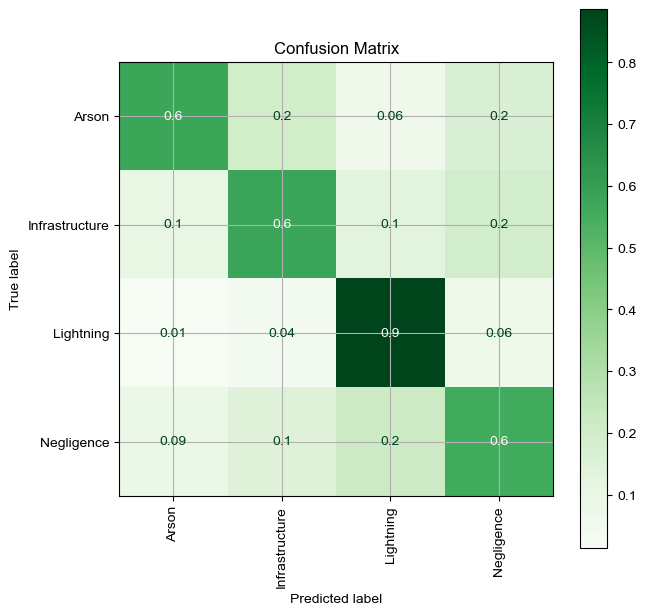

In [8]:
f,ax = plt.subplots(1,1,figsize=(7,7))
cm= ConfusionMatrixDisplay.from_estimator(model_et,Z_test,y_test, cmap = 'Greens',
                                          normalize= 'true', 
                                          xticks_rotation='vertical', 
                                          values_format='.1g', 
                                          ax=ax)
plt.title("Confusion Matrix")
plt.grid(None)
sns.set(font_scale=.9)
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"
;

In [9]:
## tweaking the model
rf_params = {
    'n_estimators':[50, 100, 150],
    'max_depth': [None, 4,8]
}

In [10]:
gs= GridSearchCV(model_et, param_grid=rf_params, cv=5, n_jobs=-2)

In [11]:
gs.fit(X_train, y_train)

/Users/ryan/miniconda3/envs/tf/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-2,
             param_grid={'max_depth': [None, 4, 8],
                         'n_estimators': [50, 100, 150]})

In [12]:
gs.best_score_

0.6843452899433199

In [13]:
gs.best_params_

{'max_depth': None, 'n_estimators': 150}

In [14]:
gs.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesClassifier(),
 'n_jobs': -2,
 'param_grid': {'n_estimators': [50, 100, 150], 'max_depth': [None, 4, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [15]:
rf_params2 = {
    'n_estimators':[200,500],
    'max_depth': [None],
    'min_samples_leaf':[1,2]
}

In [16]:
gs2= GridSearchCV(model_et, param_grid=rf_params2, cv=5, n_jobs=-2)

In [17]:
gs2.fit(X_train, y_train)

/Users/ryan/miniconda3/envs/tf/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-2,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 500]})

# BRF

# trim the fat

In [18]:
df.head()

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0


/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_7895/3246554793.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[['class_number']].sort_values('class_number', ascending=False)


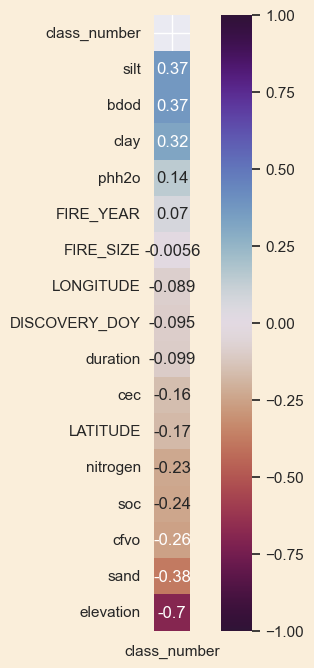

In [19]:
cause_map={'Lightning':0, 'Miscellaneous':1, 'Campfire':2,
         'Equipment Use':3, 'Arson':4, 'Debris Burning':5, 'Smoking':6,
         'Children':7, 'Railroad':8}
df['class_number'] = df['STAT_CAUSE_DESCR'].map(cause_map)

plt.figure(figsize = (8,8))

corr = df.corr()[['class_number']].sort_values('class_number', ascending=False)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);

In [37]:
X = df[['duration','FIRE_SIZE','bdod','phh2o',
         'clay', 'soc', 'sand']]
y = df['STAT_CAUSE_DESCR']

In [38]:
df.head()

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0


In [39]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [40]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)

Z_test = sc.transform(X_test)


In [41]:
model_et = ExtraTreesClassifier()
model_et.fit(Z_train, y_train)
model_et.score(Z_test, y_test)

0.5995020111089829